In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
from tensorflow import keras
from kerastuner.tuners import RandomSearch
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from keras.layers import LSTM, Bidirectional

from sklearn.metrics import confusion_matrix

In [2]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 1.3 MB/s eta 0:00:00


In [4]:
df_tr=pd.read_csv('/content/train.csv')

In [5]:
l=LabelEncoder()
df_tr=df_tr.apply(l.fit_transform)

In [6]:
df_tr.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
43616,18,10,1,2,0,5963,1,0,0,3,8,104,0,178,5,0,0
5240,14,4,1,2,0,3580,1,1,2,22,8,38,0,0,0,3,0
23624,31,7,1,1,0,3294,1,0,1,27,1,19,12,0,0,3,0
22889,17,9,1,1,0,947,0,0,0,24,1,390,7,0,0,3,0
2445,31,6,1,2,0,3090,1,0,2,12,8,98,0,0,0,3,0
5130,19,4,1,2,0,3096,0,0,2,20,8,85,3,0,0,3,0
6864,10,9,2,1,0,2450,1,0,2,27,8,347,1,0,0,3,0
15475,15,4,1,1,0,1087,0,0,0,17,5,100,3,0,0,3,0
25128,13,0,1,1,0,1029,1,0,0,17,9,474,2,0,0,3,0
12592,13,9,2,3,0,1281,0,0,2,3,5,257,0,0,0,3,0


In [7]:
df_tst=pd.read_csv('/content/test.csv')

In [8]:
df_tst=df_tst.apply(l.fit_transform)

In [9]:
x_tr=df_tr.drop("y",axis=1)
y_tr=df_tr.y
x_tst=df_tst.drop("y",axis=1)
y_tst=df_tst.y

In [10]:
x_tr.shape

(45211, 16)

In [11]:
X_train = np.array(x_tr.values.tolist())
y_train = np.array(y_tr.values.tolist())
X_test = np.array(x_tst.values.tolist())
y_test = np.array(y_tst.values.tolist())


In [12]:
X_train.shape

(45211, 16)

In [13]:
X_train.reshape(45211,16,1)

array([[[ 40],
        [  4],
        [  1],
        ...,
        [  0],
        [  0],
        [  3]],

       [[ 26],
        [  9],
        [  2],
        ...,
        [  0],
        [  0],
        [  3]],

       [[ 15],
        [  2],
        [  1],
        ...,
        [  0],
        [  0],
        [  3]],

       ...,

       [[ 54],
        [  5],
        [  1],
        ...,
        [181],
        [  3],
        [  2]],

       [[ 39],
        [  1],
        [  1],
        ...,
        [  0],
        [  0],
        [  3]],

       [[ 19],
        [  2],
        [  1],
        ...,
        [185],
        [ 11],
        [  1]]])

In [14]:
y_test.shape

(4521,)

In [15]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [16]:
X_test.shape

(4521, 16)

In [17]:
X_test.reshape(4521,16,1)

array([[[ 11],
        [ 10],
        [  1],
        ...,
        [  0],
        [  0],
        [  3]],

       [[ 14],
        [  7],
        [  1],
        ...,
        [228],
        [  4],
        [  0]],

       [[ 16],
        [  4],
        [  2],
        ...,
        [219],
        [  1],
        [  0]],

       ...,

       [[ 38],
        [  9],
        [  1],
        ...,
        [  0],
        [  0],
        [  3]],

       [[  9],
        [  1],
        [  1],
        ...,
        [140],
        [  3],
        [  1]],

       [[ 25],
        [  2],
        [  2],
        ...,
        [161],
        [  7],
        [  1]]])

In [18]:
#TUNING WITH LSTM
def build_model(hp):
    model = Sequential()
    model.add(LSTM(hp.Int('input_unit',min_value=32,max_value=512,step=32),return_sequences=True, input_shape=(16,1)))
    for i in range(hp.Int('n_layers', 1, 20)):
        model.add(LSTM(hp.Int(f'lstm_{i}_units',min_value=32,max_value=512,step=32),return_sequences=True))
    model.add(LSTM(hp.Int('layer_2_neurons',min_value=32,max_value=512,step=32)))
    model.add(Dropout(hp.Float('Dropout_rate',min_value=0,max_value=0.5,step=0.1)))
    model.add(Dense(1, activation=hp.Choice('dense_activation',values=['softmax', 'sigmoid'],default='softmax')))
    model.compile(loss='categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
    return model

In [19]:
#tuning
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=2,
    directory='model_5',
    project_name='model_6')

In [20]:
#tuning
tuner.search(X_train, y_train,
             epochs=2,
             validation_data=(X_test, y_test))

Trial 1 Complete [00h 48m 27s]
val_accuracy: 0.8847600221633911

Best val_accuracy So Far: 0.8847600221633911
Total elapsed time: 00h 48m 27s

Search: Running Trial #2

Value             |Best Value So Far |Hyperparameter
480               |160               |input_unit
8                 |20                |n_layers
192               |192               |lstm_0_units
96                |512               |layer_2_neurons
0.3               |0.2               |Dropout_rate
softmax           |sigmoid           |dense_activation
128               |32                |lstm_1_units
512               |32                |lstm_2_units
192               |32                |lstm_3_units
352               |32                |lstm_4_units
64                |32                |lstm_5_units
384               |32                |lstm_6_units
448               |32                |lstm_7_units
352               |32                |lstm_8_units
384               |32                |lstm_9_units
96          

KeyboardInterrupt: 

In [21]:
model = tuner.get_best_models(num_models=1)[0]

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 16, 160)           103680    
                                                                 
 lstm_1 (LSTM)               (None, 16, 192)           271104    
                                                                 
 lstm_2 (LSTM)               (None, 16, 32)            28800     
                                                                 
 lstm_3 (LSTM)               (None, 16, 32)            8320      
                                                                 
 lstm_4 (LSTM)               (None, 16, 32)            8320      
                                                                 
 lstm_5 (LSTM)               (None, 16, 32)            8320      
                                                                 
 lstm_6 (LSTM)               (None, 16, 32)            8

In [25]:
y_pred = model.predict(X_test)
y_true = y_test

142/142 [==============================] - 20s 142ms/step


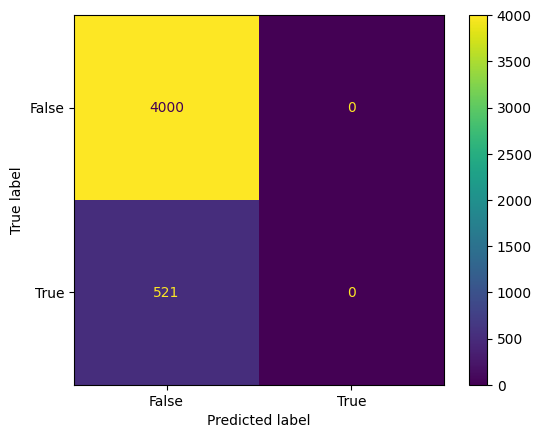

In [26]:
cm = metrics.confusion_matrix(y_true, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()